In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import matplotlib.colors as mcolors
import matplotlib.colors as mcolors
from scipy import stats
import itertools
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from glob import glob
from sqlite3_database_plot import *

def parse_list(s):
    return list(map(int, s.strip('[]').split(', ')))


In [2]:
chips = [103,107,111,113,118,122,126]

In [3]:
hexa44 = glob("data_hexa44/chip_*/from_io_delayscan_errorcounts*")
hexa46 = glob("data/chip_113/from_io_delayscan_errorcounts*")

In [4]:
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

def get_max_width(channels, err_counts):
    max_width_by_ch = []
    second_max_width_by_ch = []
    err_wrapped=np.concatenate([err_counts,err_counts[:0]])
    for ch in range(channels):
        x = err_wrapped[:,ch]
        phases = consecutive(np.argwhere(x==0).flatten())
        sizes = [np.size(a) for a in phases]
        max_width = np.max(sizes)
        sizes.remove(max_width)
        try:
            second_max_width = np.max(sizes)
        except:
            second_max_width = 0
        max_width_by_ch.append(max_width)
        second_max_width_by_ch.append(second_max_width)
    return np.array([max_width_by_ch,second_max_width_by_ch])

In [5]:
def phase_scan_eTx_width(chip=999, hexa=44 ,out_dir='PLOTS',data=glob(f"data_hexa44/chip_{999}/from_io_delayscan_errorcounts*")):
    chip_number = f'{chip}_hexa{hexa}'               
    data = data[0]
    data_eTx = genfromtxt(data,delimiter=',')
    x2 = data_eTx
    max_eTx_, max2_eTx_ = get_max_width(13,x2)
    x2 = np.array(x2)
    x2 = np.minimum(x2, 255)
    print(f'{chip_number}------------------------')
    print(get_max_width(13,x2))

In [6]:
for chip in chips:
    phase_scan_eTx_width(chip=chip, hexa=44,out_dir='eTx_plots',data=glob(f"data_hexa44/chip_{chip}/from_io_delayscan_errorcounts*"))
    phase_scan_eTx_width(chip=chip, hexa=46,out_dir='eTx_plots',data=glob(f"data/chip_{chip}/from_io_delayscan_errorcounts*"))

103_hexa44------------------------
[[17 15 18 18 18 17 19 17 19 16 19 18 17]
 [15 11 15 12 17 13 18 16 19 12 16 16 13]]
103_hexa46------------------------
[[15 16 17 17 17 17 18 16 18 17 17 18 17]
 [14 15 16 17 13 16 13 14 14 16 15 15 17]]
107_hexa44------------------------
[[16 15 17 17 16 16 18 16 18 17 19 18 16]
 [16 14 12 17 14 11 16 13 16 16 13 13 13]]
107_hexa46------------------------
[[15 15 17 16 16 16 17 16 17 16 18 18 16]
 [14 14 16 16 14 15 13 15 13 15 17 17 16]]
111_hexa44------------------------
[[16 17 19 17 18 18 18 19 19 17 17 18 17]
 [15 15 12 16 14 11 17 14 18 16 14 14 12]]
111_hexa46------------------------
[[15 15 17 16 16 16 17 16 18 16 16 18 16]
 [14 15 15 16 14 16 12 15 13 15 16 15 16]]
113_hexa44------------------------
[[15 17 17 17 17 15 17 18 18 16 17 17 16]
 [15 15 13 17 11 13 14 12 15 15 11 12 14]]
113_hexa46------------------------
[[15 16 16 16 16 16 16 15 17 16 17 17 16]
 [14 15 16 15 16 15 14 15 14 15 16 17 15]]
118_hexa44------------------------
[[16 

In [7]:
def phase_scan_eTx(chip=999, hexa=44 ,out_dir='PLOTS',data=glob(f"data_hexa44/chip_{999}/from_io_delayscan_errorcounts*")):
    chip_number = f'{chip}_hexa{hexa}'               
    data = data[0]
    data_eTx = genfromtxt(data,delimiter=',')
    x2 = data_eTx[1:,:]
    max_eTx_, max2_eTx_ = get_max_width(13,x2)
    x2 = np.array(x2)
    x2 = np.minimum(x2, 255)
    norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 255, vcenter=0.1)
    plt.figure(figsize=(15, 10))
    a,b=np.meshgrid(np.arange(13),np.arange(63))
    plt.hist2d(a.flatten(),b.flatten(),weights=x2.flatten(),bins=(np.arange(14)-0.5,np.arange(64)-0.5),cmap='bwr',norm=norm);
    plt.xticks(np.arange(0,13,1))
    plt.colorbar().set_label(label='Data transmission errors')
    plt.yticks(np.arange(0,64,4))    
    plt.grid(color='white', linestyle='--', linewidth=.5)
    plt.title(f"ECON-T 1.28 GHz output phase scan {chip_number}")
    plt.ylabel('Phase Select Setting')
    plt.xlabel('Channel Number')
    plt.ylabel('Phase Select Setting')
    plt.xlabel('Channel Number')

In [8]:
phase_scan_eTx_width(chip=103, hexa=44,out_dir='eTx_plots',data=glob(f"data_hexa44/chip_{chip}/from_io_delayscan_errorcounts*"))
phase_scan_eTx_width(chip=103, hexa=46,out_dir='eTx_plots',data=glob(f"data/chip_{chip}/from_io_delayscan_errorcounts*"))

103_hexa44------------------------
[[16 16 16 17 17 16 17 17 18 16 16 17 17]
 [15 14 13 16 12 12 14 11 15 15 11 11 12]]
103_hexa46------------------------
[[15 16 17 16 16 16 17 17 18 17 17 17 16]
 [14 16 15 16 13 16 14 14 14 16 14 15 16]]


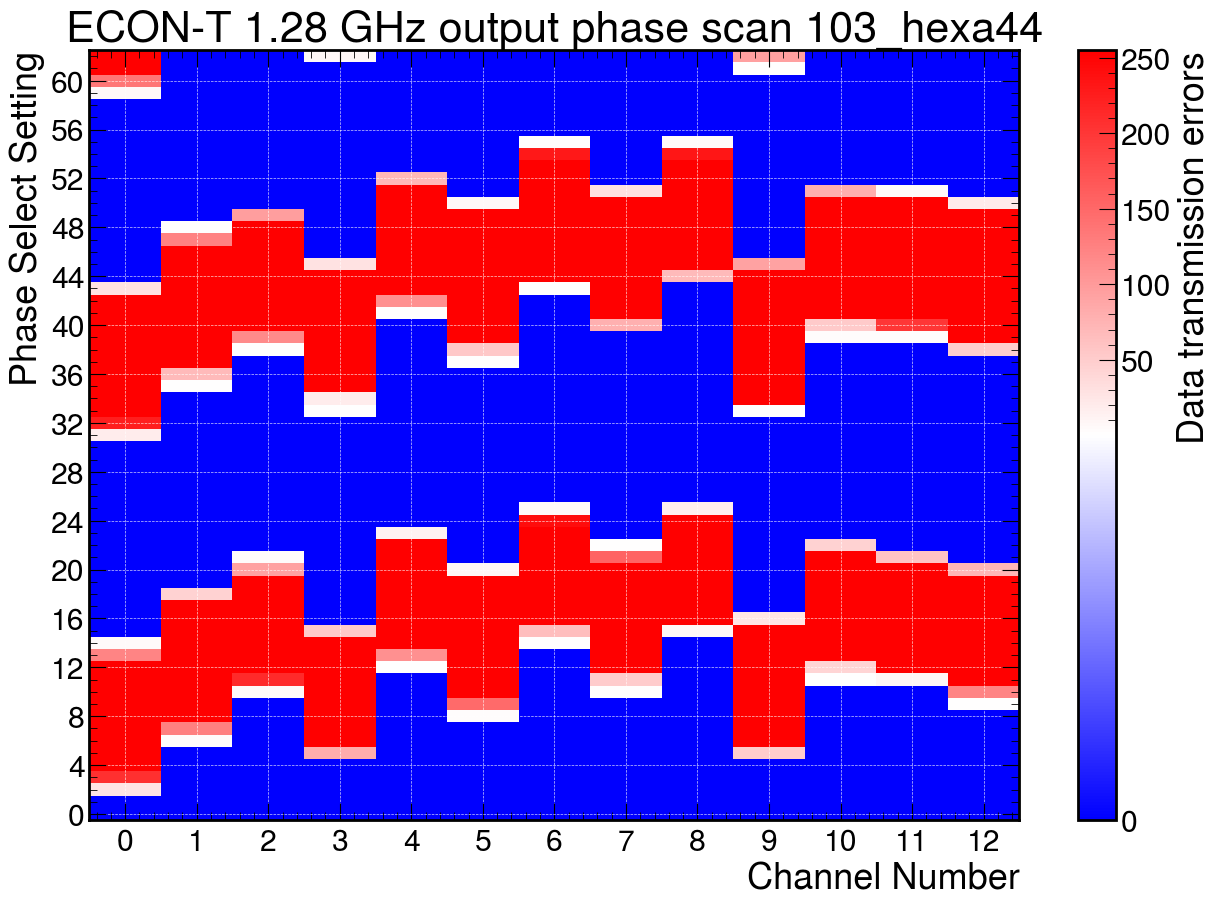

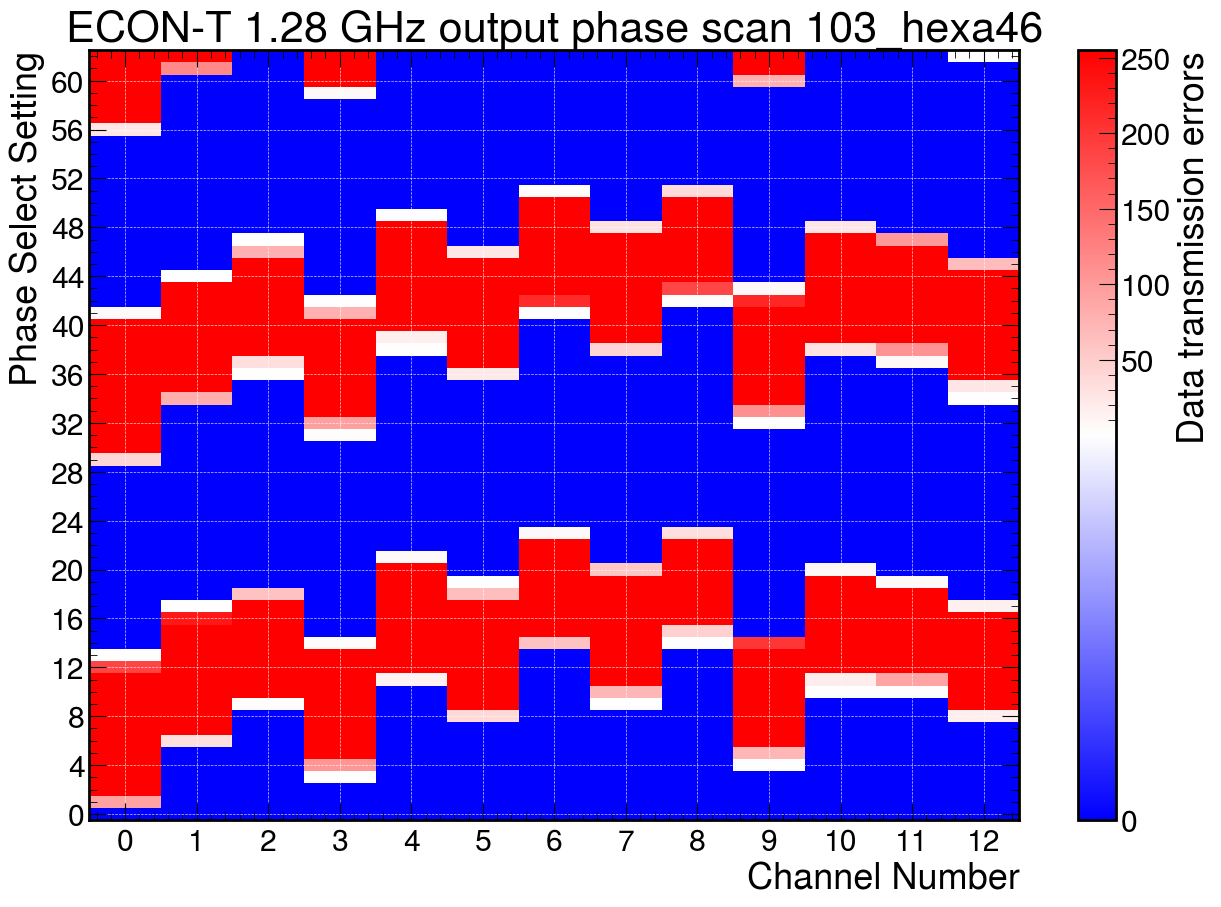

In [9]:
phase_scan_eTx(chip=103, hexa=44 ,out_dir='PLOTS',data=glob(f"data_hexa44/chip_{chip}/from_io_delayscan_errorcounts*"))
phase_scan_eTx(chip=103, hexa=46,out_dir='eTx_plots',data=glob(f"data/chip_{chip}/from_io_delayscan_errorcounts*"))



In [10]:
def get_max_width_2(channels, err_counts):
    max_width_by_ch = []
    second_max_width_by_ch = []
    err_wrapped=np.concatenate([err_counts,err_counts[:0]])
    for ch in range(channels):
        x = err_wrapped[:,ch]
        phases = consecutive(np.argwhere(x==0).flatten())
        sizes = [np.size(a) for a in phases]
        max_width = np.max(sizes)
        sizes.remove(max_width)
        try:
            second_max_width = np.max(sizes)
        except:
            second_max_width = 0
        max_width_by_ch.append(max_width)
        second_max_width_by_ch.append(second_max_width)
    return np.array([max_width_by_ch,second_max_width_by_ch])

Text(1, 0, 'Channel Number')

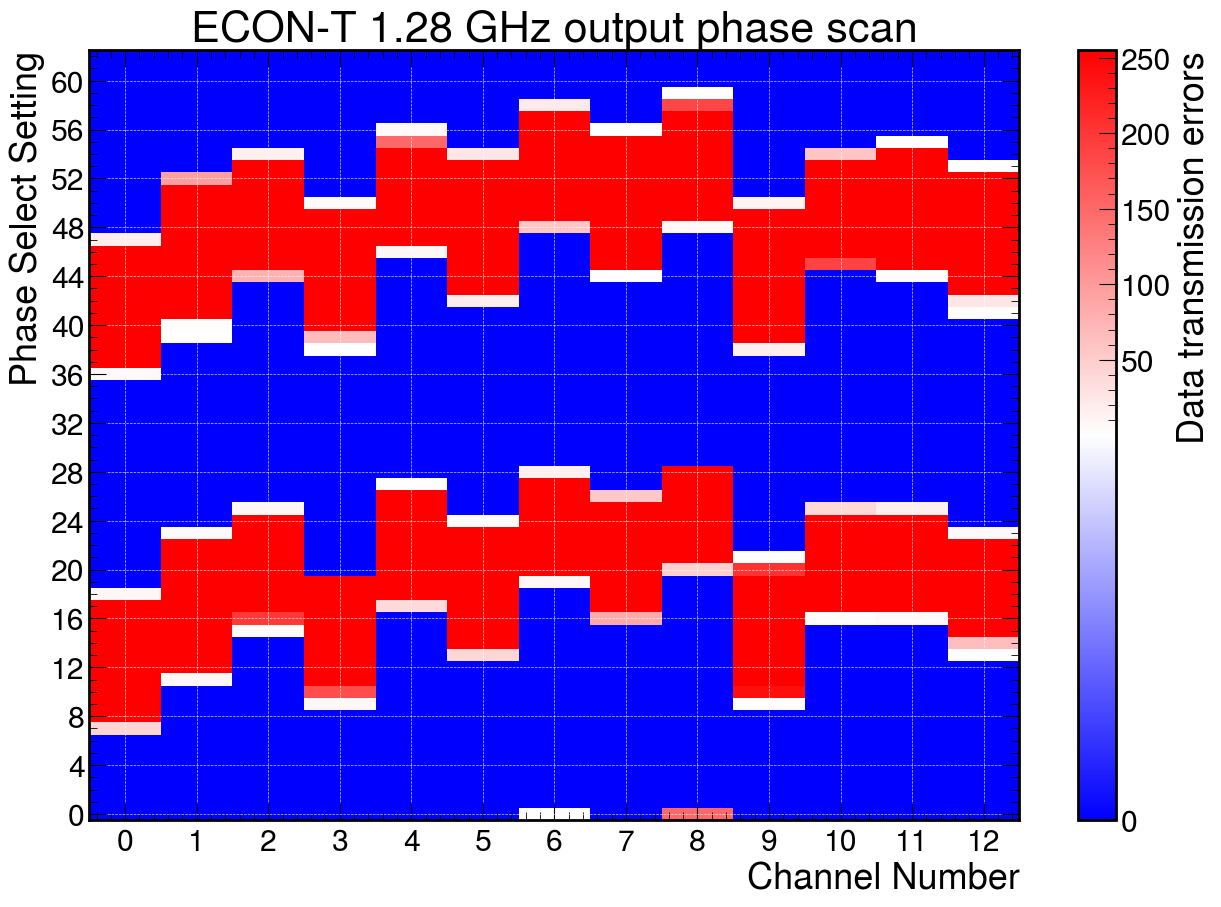

In [11]:
data=glob(f"data_hexa44/chip_103/from_io_delayscan_errorcounts*")              
data = data[0]
data_eTx = genfromtxt(data,delimiter=',')
x2 = data_eTx[1:,:]
x2 = np.array(x2)
x2 = np.minimum(x2, 255)
norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 255, vcenter=0.1)
plt.figure(figsize=(15, 10))
a,b=np.meshgrid(np.arange(13),np.arange(63))
plt.hist2d(a.flatten(),b.flatten(),weights=x2.flatten(),bins=(np.arange(14)-0.5,np.arange(64)-0.5),cmap='bwr',norm=norm);
plt.xticks(np.arange(0,13,1))
plt.colorbar().set_label(label='Data transmission errors')
plt.yticks(np.arange(0,64,4))    
plt.grid(color='white', linestyle='--', linewidth=.5)
plt.title(f"ECON-T 1.28 GHz output phase scan")
plt.ylabel('Phase Select Setting')
plt.xlabel('Channel Number')
plt.ylabel('Phase Select Setting')
plt.xlabel('Channel Number')

In [12]:
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

data=glob(f"data_hexa44/chip_103/from_io_delayscan_errorcounts*")
data = data[0]
data_eTx = genfromtxt(data,delimiter=',')
x2 = data_eTx
max_width_by_ch = []
second_max_width_by_ch = []
err_wrapped=np.concatenate([x2,x2[:0]])
for ch in range(1):
    x = err_wrapped[:,ch]
    phases = consecutive(np.argwhere(x==0).flatten())
#     print(phases)
    sizes = [np.size(a) for a in phases]
    print(sizes)
    max_width = np.max(sizes)
    sizes.remove(max_width)
    try:
        second_max_width = np.max(sizes)
    except:
        second_max_width = 0
    max_width_by_ch.append(max_width)
    second_max_width_by_ch.append(second_max_width)
print(max_width_by_ch)
print(second_max_width_by_ch)

[7, 17, 15]
[17]
[15]


In [13]:
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

data=glob(f"data_hexa44/chip_107/from_io_delayscan_errorcounts*")
data = data[0]
data_eTx = genfromtxt(data,delimiter=',')
x2 = data_eTx


def get_phase_width(err_counts):
    max_width_by_ch = []
    for ch in range(13):
        x = err_counts[:,ch]
        phases = consecutive(np.argwhere(x==0).flatten())
        sizes = [np.size(a) for a in phases]
        remove_indexs = []
        remove_sizes=[]
        try:
            for l in phases:
                if l[0]==1 or l[-1]==63:
                    indices = [i for i, arr in enumerate(phases) if np.array_equal(arr, l)]
                    remove_indexs.append(indices[0])
                    remove_sizes.append(sizes[indices[0]])
            for i in remove_sizes:
                sizes.remove(i)
            max_width = np.max(sizes)
#             print(sizes)
        except:
            max_width = 0
        max_width_by_ch.append(max_width)
    return max_width_by_ch
print(get_phase_width(x2))


[16, 15, 17, 17, 16, 16, 18, 16, 18, 17, 19, 18, 16]


Text(1, 0, 'Channel Number')

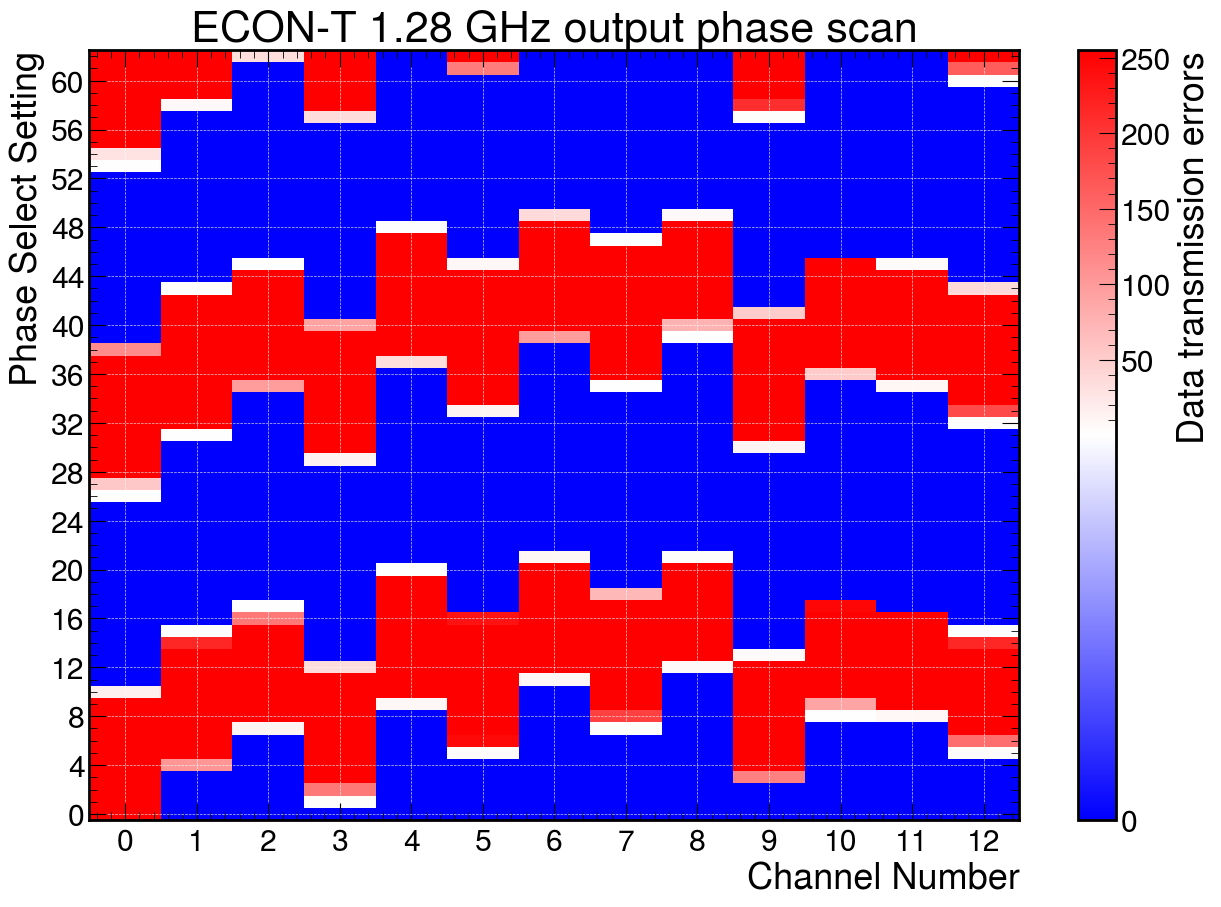

In [20]:
data=glob(f"data/chip_107/from_io_delayscan_errorcounts*")              
data = data[0]
data_eTx = genfromtxt(data,delimiter=',')
x2 = data_eTx[1:]
x2 = np.array(x2)
x2 = np.minimum(x2, 255)
norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 255, vcenter=0.1)
plt.figure(figsize=(15, 10))
a,b=np.meshgrid(np.arange(13),np.arange(63))
plt.hist2d(a.flatten(),b.flatten(),weights=x2.flatten(),bins=(np.arange(14)-0.5,np.arange(64)-0.5),cmap='bwr',norm=norm);
plt.xticks(np.arange(0,13,1))
plt.colorbar().set_label(label='Data transmission errors')
plt.yticks(np.arange(0,64,4))    
plt.grid(color='white', linestyle='--', linewidth=.5)
plt.title(f"ECON-T 1.28 GHz output phase scan")
plt.ylabel('Phase Select Setting')
plt.xlabel('Channel Number')
plt.ylabel('Phase Select Setting')
plt.xlabel('Channel Number')

In [52]:
# def get_phase_width(err_counts):
#     max_width_by_ch = []
#     for ch in range(13):
#         x = np.transpose(err_counts)[ch]
#         phases = consecutive(np.argwhere(np.transpose(x)==0).flatten())
#         sizes = [np.size(a) for a in phases]
#         remove_indexs = []
#         remove_sizes=[]
#         try:
#             for l in phases:
#                 if l[0]==1 or l[-1]==62:
#                     indices = [i for i, arr in enumerate(phases) if np.array_equal(arr, l)]
#                     remove_indexs.append(indices[0])
#                     remove_sizes.append(sizes[indices[0]])
#             for i in remove_sizes:
#                 sizes.remove(i)
#             max_width = np.max(sizes)
#         except:
#             max_width = 0
#         max_width_by_ch.append(max_width)
#     return max_width_by_ch
# print(get_phase_width(x2))

In [64]:
def get_eTx_width(err_counts):
    max_width_by_ch = []
    for ch in range(13):
        x = np.transpose(err_counts)[ch]
        phases = consecutive(np.argwhere(x==0).flatten())
        print(f"phases: {ch}",phases)
        sizes = [np.size(a) for a in phases]
        print(f"size all {ch}", sizes)
        remove_indexs = []
        remove_sizes=[]
        try:
            for l in phases:
                if l[0]== 0 or l[-1]==62:
                    indices = [i for i, arr in enumerate(phases) if np.array_equal(arr, l)]
                    remove_indexs.append(indices[0])
                    remove_sizes.append(sizes[indices[0]])
            for i in remove_sizes:
                sizes.remove(i)
            print(f"max sizes {ch}:",sizes)
            max_width = sizes[0]
        except:
            max_width = 0
        max_width_by_ch.append(max_width)
    return max_width_by_ch

data=glob(f"data/chip_107/from_io_delayscan_errorcounts*")              
data = data[0]
data_eTx = genfromtxt(data,delimiter=',')

data_eTx[1:]
print(get_eTx_width(data_eTx[1:]))

phases: 0 [array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]), array([39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52])]
size all 0 [15, 14]
max sizes 0: [15, 14]
phases: 1 [array([0, 1, 2, 3]), array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), array([44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57])]
size all 1 [4, 15, 14]
max sizes 1: [15, 14]
phases: 2 [array([0, 1, 2, 3, 4, 5, 6]), array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]), array([46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])]
size all 2 [7, 17, 16]
max sizes 2: [17, 16]
phases: 3 [array([0]), array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]), array([41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56])]
size all 3 [1, 16, 16]
max sizes 3: [16, 16]
phases: 4 [array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]), array([49, 50, 51, 52, 53, 54, 5

In [65]:
data=glob(f"data/chip_107/from_io_delayscan_errorcounts*")              
data = data[0]
data_eTx = genfromtxt(data,delimiter=',')

data_eTx[1:,4]


array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.0000e+00,
       7.8100e+02, 4.2300e+03, 9.2880e+03, 1.4899e+04, 1.4731e+04,
       1.4062e+04, 7.2880e+03, 3.0190e+03, 3.4570e+03, 2.8800e+02,
       2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 3.3000e+01, 1.5930e+03, 5.9610e+03,
       1.0646e+04, 1.4903e+04, 1.4639e+04, 1.2332e+04, 5.3150e+03,
       1.5160e+03, 3.5040e+03, 7.5900e+02, 2.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00])

In [66]:
file_paths_delayscan = glob("data/chip_*/from_io_delayscanchip*.csv")
file_paths_2_delayscan = glob("data/chip_*/from_io_delayscan_err*.csv")
file_path_prbs_scan = glob("data/chip_*/prbs_counters_scan*")

for path in file_paths_2_delayscan:
    file_paths_delayscan.append(path)
file_paths_delayscan = sorted(file_paths_delayscan)
file_path_prbs_scan  = sorted(file_path_prbs_scan)

In [67]:
eTx = []
for i in range(len(file_paths_delayscan)):
    data = genfromtxt(file_paths_delayscan[i], delimiter=',')
    eTx.append(get_eTx_width(data[1:,:]))

phases: 0 [array([0, 1, 2]), array([15, 16, 17, 18, 19]), array([21, 22, 23, 24, 25, 26, 27, 28, 29]), array([43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56])]
size all 0 [3, 5, 9, 14]
max sizes 0: [5, 9, 14]
phases: 1 [array([0, 1, 2, 3, 4, 5]), array([19, 20, 21, 22]), array([25, 26, 27, 28, 29, 30, 31, 32]), array([47, 48]), array([53]), array([55, 56, 57, 58, 59, 60])]
size all 1 [6, 4, 8, 2, 1, 6]
max sizes 1: [4, 8, 2, 1, 6]
phases: 2 [array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([21]), array([24]), array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]), array([56, 57, 58, 59, 60, 61, 62])]
size all 2 [10, 1, 1, 12, 7]
max sizes 2: [10, 1, 1, 12]
phases: 3 [array([0, 1, 2, 3, 4]), array([17, 18, 19, 20, 21, 22]), array([24, 25, 26, 27, 28, 29, 30, 31]), array([44, 45, 46, 47, 48, 49]), array([52, 53, 54, 55, 56, 57, 58, 59, 60])]
size all 3 [5, 6, 8, 6, 9]
max sizes 3: [6, 8, 6, 9]
phases: 4 [array([ 4,  5,  6,  7,  8,  9, 10, 11, 12]), array([24, 25, 26, 27]),

phases: 0 [array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]), array([39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53])]
size all 0 [15, 15]
max sizes 0: [15, 15]
phases: 1 [array([0, 1, 2, 3]), array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), array([44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57])]
size all 1 [4, 15, 14]
max sizes 1: [15, 14]
phases: 2 [array([0, 1, 2, 3, 4, 5, 6, 7]), array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]), array([46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])]
size all 2 [8, 16, 16]
max sizes 2: [16, 16]
phases: 3 [array([0, 1]), array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]), array([41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55])]
size all 3 [2, 15, 15]
max sizes 3: [15, 15]
phases: 4 [array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]), array([48, 49, 50, 51, 52, 

phases: 0 [array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]), array([39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53])]
size all 0 [15, 15]
max sizes 0: [15, 15]
phases: 1 [array([0, 1, 2]), array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), array([42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57])]
size all 1 [3, 16, 16]
max sizes 1: [16, 16]
phases: 2 [array([0, 1, 2, 3, 4, 5]), array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]), array([45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])]
size all 2 [6, 17, 17]
max sizes 2: [17, 17]
phases: 3 [array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]), array([41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56])]
size all 3 [17, 16]
max sizes 3: [17, 16]
phases: 4 [array([0, 1, 2, 3, 4, 5, 6, 7]), array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]), array([47, 48, 49, 50, 51, 5

phases: 0 [array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]), array([38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])]
size all 0 [15, 13]
max sizes 0: [15, 13]
phases: 1 [array([0, 1]), array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]), array([42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55])]
size all 1 [2, 14, 14]
max sizes 1: [14, 14]
phases: 2 [array([0, 1, 2, 3, 4]), array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]), array([44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59])]
size all 2 [5, 16, 16]
max sizes 2: [16, 16]
phases: 3 [array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]), array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53])]
size all 3 [16, 14]
max sizes 3: [16, 14]
phases: 4 [array([0, 1, 2, 3, 4, 5, 6]), array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]), array([47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62])]
size all 4 [

phases: 0 [array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]), array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54])]
size all 0 [15, 15]
max sizes 0: [15, 15]
phases: 1 [array([0, 1, 2, 3]), array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]), array([44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58])]
size all 1 [4, 15, 15]
max sizes 1: [15, 15]
phases: 2 [array([0, 1, 2, 3, 4, 5, 6, 7]), array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]), array([46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62])]
size all 2 [8, 16, 17]
max sizes 2: [16]
phases: 3 [array([0, 1]), array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), array([42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57])]
size all 3 [2, 16, 16]
max sizes 3: [16, 16]
phases: 4 [array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]), array([50, 51, 52, 

Text(1, 0, 'Channel')

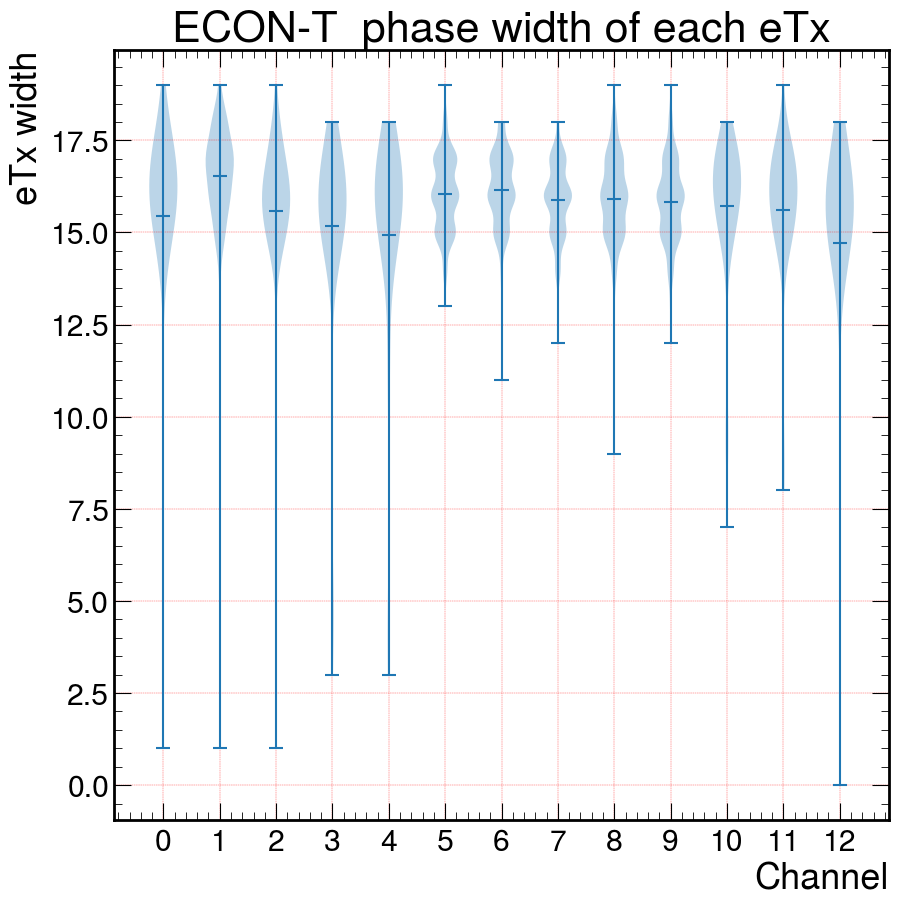

In [71]:
data = np.array(eTx).reshape(13,195)
plt.violinplot(np.transpose(data), showmeans=True, showextrema=True)
plt.xticks(range(1,14), ['0','1', '2', '3' ,'4', '5', '6',
                                  '7', '8', '9', '10', '11','12'])
plt.title(f"ECON-T  phase width of each eTx")
plt.grid(color='r', linestyle='--', linewidth=.3)
plt.ylabel(f'eTx width')
plt.xlabel('Channel')

Text(1, 0, 'Phase width')

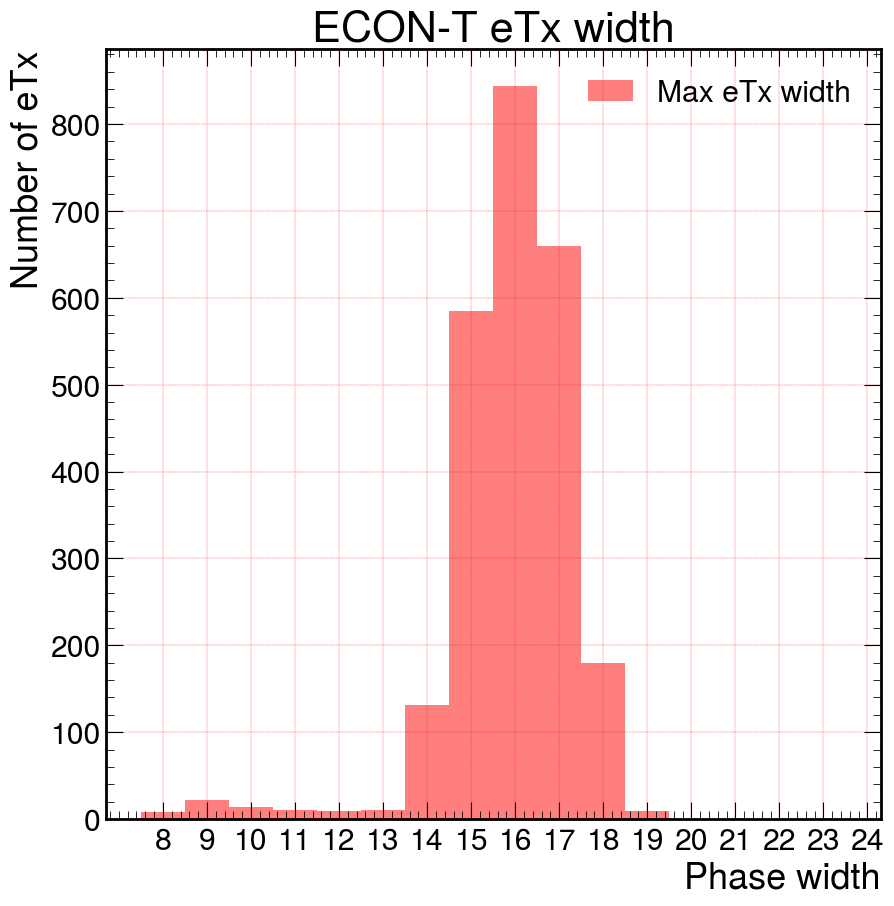

In [70]:
max_width = np.array(eTx).flatten()
plt.hist(max_width, bins= np.arange(8,25,1)-0.5,color='r',alpha=0.5,label="Max eTx width")
plt.xticks(np.arange(8,25,1))
plt.title(f"ECON-T eTx width")
plt.grid(color='r', linestyle='--', linewidth=.3)
plt.legend()
plt.ylabel('Number of eTx')
plt.xlabel('Phase width')
    
    